In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f = w *x[i] + b
        cost = cost + (f - y[i])**2
    
    cost = cost / (2*m)
    return cost

In [3]:
def compute_grediant(x, y, w, b):
    """
    Computes grediants for linear regression
    Args:
        x (ndarray (m,)): input data, m examples
        y (ndarray (m,)): target values
        w (float): coefficient of the linear model
        b (float): bias (intersection) of the linear model
    Returns:
        dj_dw (float): gradient of the cost with respect to w
        dj_db (float): gradient of the cost with respect to b
    """

    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f = w * x[i] + b
        dj_dw += (f - y[i])*x[i]
        dj_db += (f - y[i])
    
    return dj_dw/m, dj_db/m

In [94]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_functions, gradient_function):
    """
    Performs gradient descent to fit w and b
    
    Args: 
        x (ndarray (m,)): input data, m examples
        y (ndarray (m,)): target values
        w_in (float): initial value of w
        b_in (float): initial value of b
        alpha (float): learning rate
        num_iters (int): number of iterations to run the grediant descent
        cost_functions (function): function to call for computing the cost
        gradient_function (function): function to call for computing the gradient
    Returns:
        w (float): coefficient of the linear model
        b (float): bias (intersection) of the linear model
        J_history (list): history of cost values through the iterations
        p_history (list): history [w,b] through the fitting procedure
    """

    # The initial values of w and b
    arr = np.array([w_in, b_in])
    J_history = np.zeros((num_iters, 1))
    p_history = np.zeros((num_iters, 2))

    for i in range(num_iters):
        gradiant = compute_grediant(x, y, arr[0], arr[1])
        J_history[i] = compute_cost(x, y, arr[0], arr[1])
        p_history[i] = gradiant
        
        arr = arr - alpha * np.array(gradiant)

        # The convergance criterion
        if False:
            break
    return arr[0], arr[1], J_history, p_history

In [96]:
xTrain = np.array([1, 2])
yTrain = np.array([300, 500])

[w, b, jHist, pHist] = gradient_descent(xTrain, yTrain, 0, 0, 0.1, 1000, compute_cost, compute_grediant)

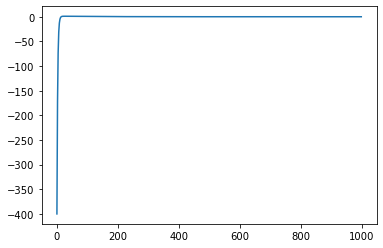

In [114]:
plt.plot(pHist[:,1])
plt.show()